# Final Programming Assignment
## Data Analysis

_Berlin School of Mind and Brain  
Winter Semester 19-20  
Course: Introduction to Python  
Lecturer: Dr. Luke Tudge  
Author of the project: Ayşenur Akyüz_

# Table of Contents <sup>[1](#1)</sup>

1. [Introduction](#intro) <br>
   1.1 [Task 1](#one)<br>
   1.2 [Task 2](#two)<br>
   1.3 [Task 3](#three)
2. [Getting Started](#get)
3. [Results for Task1](#task1)
4. [Results for Task2](#task2)
5. [Results for Task3](#task3)
6. [Controls](#cont)
7. [References](#ref)

## Introduction
<a id="intro"></a>

As the final assignment for the Python class, I selected the task number 3, the data analysis: bugs

Here in the following section you may see what we are required to do, I am directly copying the words of our lecturer for  practical reasons:<br>  A somewhat silly psychology experiment conducted in 2013 measured subjects’ reactions to
pictures of bugs. Independent raters had deemed the bugs to be either disgusting or non-disgusting,
and either frightening or non-frightening. The subjects had to rate how much they wanted to kill
each bug, on a scale from 1 to 10.<br> You can read more about the experiment here:<br>
https://doi.org/10.1016/j.chb.2013.01.024 <br>
And you can obtain a csv file of the data from the experiment here:<br>
https://raw.githubusercontent.com/luketudge/stats-tutorials/master/tutorials/data/bugs.csv <br>
Write a Python program that produces an analysis of these data. Your program should print some
numerical summaries and produce a plot: <br>


__Task 1:__ <br> <a id="one"></a>
- Summary statistics of the kill ratings for each type of bug:<br>
 - minimum <br>
 - maximum <br>
 - median <br>
 - mean <br>
 - Standard Deviation <br>  


__Task 2:__<br> <a id="two"></a>
- The results of a linear model with kill rating as the outcome variable and the categories of
bug as the predictor variables

__Task 3:__ <br>  <a id="three"></a>
- Boxplots with overlaid points showing the distribution of kill ratings for each category of
bug.<br>
- Try to recreate the main features of the plot shown below.


![Image](https://raw.githubusercontent.com/aysenurakyuz/Pyhton-Final-Assignment/master/graph.jpg) 

## Getting Started <a id="get"></a>

To analyze our data we need to import several standard libraries. However I am going to import these step by step when having them is necessary for the task.


To analyze this data, first we need to pull the related data from our operating system and to do this first we need to allow our program to interact with the operating system. To do the latter we say:  

In [3]:
import os

The file that we want to use should be in the same directory with our program. I created this file path to call the 'bugs' file, therefore to manipulate it further.

In [4]:
filepath = os.path.join('bugs.csv')

Now we are importing another standard library: pandas. The pandas library provides data structures and functions, and facilitates data analysis

In [5]:
import pandas

We do the following to read the file. 'df' signifies the 'bugs' file. I named this as 'df', not 'bugs' so one can easily change the file that she wants to use or the rest of the program by only changing the name of the file. So if we want to change the data thus the file we use, we need to change the name of the file in os.path.join() command. Of course again the new file and the program should be in the same directory.  

In [6]:
df = pandas.read_csv(filepath)

We can say print df to see whether our program successfully reads the file. Since the data consist of lots of columns, our program shows only a few of the first and last columns.

In [7]:
print(df)

     Subject     Sex Disgust  Fear  KillRating
0          1  Female     low   low         6.0
1          3  Female     low   low         5.0
2          4  Female     low   low         6.0
3          5  Female     low   low         3.0
4          6  Female     low   low         2.0
..       ...     ...     ...   ...         ...
343       96    Male    high  high        10.0
344       97  Female    high  high        10.0
345       98  Female    high  high        10.0
346       99  Female    high  high        10.0
347      100  Female    high  high         3.0

[348 rows x 5 columns]


The tasks requires us to test different aspects of the variable: 'Kill Rating' according to 2 other variables: 'Disgust' and 'Fear'. Therefore 'Kill Rating' becomes our outcome variable and the other 2 variables become our predictive variables.
We are not going to name the variables as the way they were named in the experiment. But we are going use generic variable names such as outcome variable and predictive variables so if we want use a different data (file)  or a different variable from our current data, we can easily change the rest of the program without breaking it.

In [8]:
outcome_var = df['KillRating']
predictive_var1 =df['Disgust']
predictive_var2 = df['Fear']


However, we need to be careful about changing the file or variables. Because our program only works in the way that we want when our predictive variables are categorical and our outcome variable is quantitative, we can inform the user about this situation by forming a warning.<sup>[2](#2)</sup>

In [9]:
import warnings

warnings.warn("Please check if the predictable variables are categorical and the outcome variable is quantitative")

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Please check if the predictable variables are categorical and the outcome variable is quantitative
  This is separate from the ipykernel package so we can avoid doing imports until


## Results for Task 1 <a id="task1"></a>

After we handle the details, we may continue with the real requirement of Task 1. First we import another standard library 'statistics' to execute some stastical functions.

In [10]:
import statistics

The task 1 demands the summary statistics of kill rating for each type of bug.Thus, we need to group the outcome variable according to predictable variables, we do this by using groupby() method. Then we use aggregate() method to make a table for the summary stats results.<sup>[3](#1)</sup>

In [11]:
outcome_var.groupby([predictive_var1, predictive_var2]).aggregate([min, statistics.median, statistics.mean, statistics.stdev, max])


min  median      mean     stdev   max
Disgust Fear                                       
high    high  0.0     8.5  7.804598  2.495760  10.0
        low   0.0     7.5  6.660920  3.151683  10.0
low     high  0.5     8.0  7.339080  2.551213  10.0
        low   0.0     6.0  5.632184  2.680094  10.0

# Results for Task 2 <a id="task2"></a>

To create a multiple linear regression model, we first need to import another standard library that is called stastmodels. This library allows us to assess various type of statistical models. Also, we will use formula module in this library to form our own formulas in the 'string' form. And we also need ols method

In [12]:
from statsmodels.formula.api import ols

We will use a R-style formula as indicated below and use fit method to get our regression model.

In [13]:
model = ols('outcome_var ~ predictive_var1 +  predictive_var2', data=df)
model = model.fit()

To present our model:

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            outcome_var   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     15.10
Date:                Thu, 21 May 2020   Prob (F-statistic):           5.18e-07
Time:                        20:12:49   Log-Likelihood:                -841.99
No. Observations:                 348   AIC:                             1690.
Df Residuals:                     345   BIC:                             1702.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.9454      0.254     31.327      0.000       7.447       8.444
predictive_var1[T.low]    -0.7471      0.293     -2.551      0.011      -1.323      -0.171
predictive_var2[T.low]    -1.4253      0.293     -4.867      0.000      -2.001      -0.849
==============================================================================
Omnibus:                       24.495   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.814
Skew:                          -0.652   Prob(JB):                     1.50e-06
Kurtosis:                       2.617   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this table we have lots of information but only few of them is relevant for our model. Intercept represents the baseline number and coefficient values of our predictive variables represent the multiplier value of them. <br> So our equation is: $$ KillRating = 7.95 - 0.74Disgust - 1.43Fear + \epsilon $$

If you do now want to deal with the complicated table above you can do the following to get the outputs that you need: <sup>[4](#4)</sup> 

In [15]:
model.params

Intercept                 7.945402
predictive_var1[T.low]   -0.747126
predictive_var2[T.low]   -1.425287
dtype: float64

## Results for Task  3 <a id="task3"></a>

Now for this task we need to form an overlapping scatter plot and boxplot which shows rates of kill ratings for each type of bug. We need to import a standard library: seaborn. Seaborn makes our life easier when it comes to data visualization. Also we are going to import another standard library, maltplotlib which is also used widely for data visualization. We will use this for further modifying and handling details of the plot.<sup>[5](#5)</sup>


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

First I am going to run stripplot and boxplot functions separately to make sure that we understand how these functions work.
To create a stripplot we use stripplot function of seaborn. In the plot that our lecturer provided to us: in x axis we have Disgust and in y axis we have Kill Rating and these variables grouped by Fear into different color markers. So we draw our plot accordingly: x is our predictive variable thus 'Disgust' and y is our outcome variable thus 'KillRating'. 'Hue' represents which varible we want to group into different colors, in our case it is predictive variable 2, thus 'Fear'.<sup>[5](#5)</sup>
Jitter can be used when you have too much data points which result in overlaps, it makes the distrubion more viewer-friendly. Dodge is used to avoid data points of different hues to overlap. I think the rest is kind of self explanatory.<sup>[6](#6)</sup>

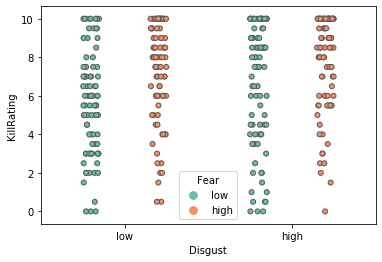

In [17]:
sns.stripplot(x= predictive_var1 , y= outcome_var  , hue= predictive_var2,
data=df, jitter=True,
palette="Set2", dodge=True,linewidth=1,edgecolor='gray')


Now we are going to create a boxplot. This time we use boxplot function of seaborn. The rest is the same as stripplot. Also we name this plot below as 'ax' so we can make changes in further steps.<sup>[5](#5)</sup>

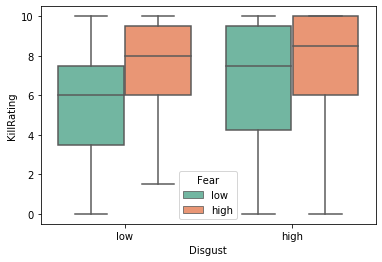

In [18]:
ax = sns.boxplot(x= predictive_var1 , y= outcome_var  , hue= predictive_var2,
data=df,palette="Set2",fliersize=0)

To create a combination of stripplot and boxplot that we formed above, we are going to run them in the same cell.<sup>[5](#5)</sup>

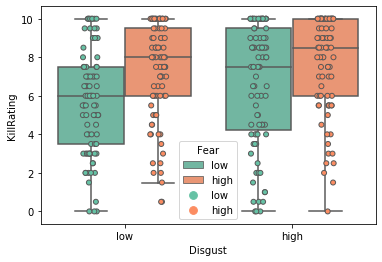

In [19]:
plot = sns.stripplot(x= predictive_var1 , y= outcome_var  , hue= predictive_var2,
data=df, jitter=True,
palette="Set2", dodge=True,linewidth=1,edgecolor='gray')
ax = sns.boxplot(x= predictive_var1 , y= outcome_var  , hue= predictive_var2,
data=df,palette="Set2",fliersize=0)

Now I want to make a few changes to make our plot look more similar to our lecturer's plot.<sup>[5](#5)</sup> <sup>[6](#6)</sup> <sup>[7](#7)</sup> <sup>[8](#8)</sup> <sup>[9](#9)</sup> <sup>[10](#10)</sup> <sup>[11](#11)</sup>

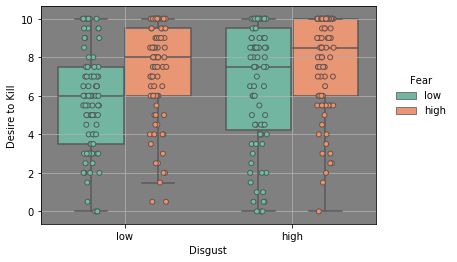

In [20]:
#to create the plot again
plot = sns.stripplot(x= predictive_var1 , y= outcome_var  , hue= predictive_var2,
data=df, jitter=True,
palette="Set2", dodge=True,linewidth=1,edgecolor='gray')
ax = sns.boxplot(x= predictive_var1 , y= outcome_var  , hue= predictive_var2,
data=df,palette="Set2",fliersize=0)

# change the label of y axis
ax.set(ylabel='Desire to Kill')

 
#to have grids
plt.grid(True)


#to change background color
ax.set_facecolor('gray')

#get the handles and labels
handles, labels = ax.get_legend_handles_labels()

#in the previous plot we have double legeng. to keep the first two elements i.e. legend for boxplot: 
l = plt.legend(handles[0:2], labels[0:2],
# to put a title to legend               
title='Fear',
#change the location of legend
bbox_to_anchor=(1.05, 0.7), loc= 2, borderaxespad=0.)

#to remove the border of legend
l.get_frame().set_linewidth(0.0)   


## Controls <a id="cont"></a>

Now I want to make sure if our program works if we use another variable from our current data or when we use entirely different data set. We are going to this by creating boxplots with these new data. First we are going to test the condition that we use another variable from our data. In the bugs file there is another variable called 'Sex'. We are going to change the predictive varible into this newly introduced data and see what happens. <br> P.S.: The predictive variable should be categorical as it was indicated at the warning above.

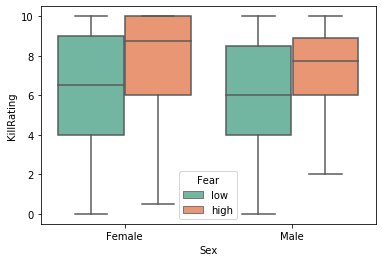

In [21]:
predictive_var1 = df['Sex']
sns.boxplot(x= predictive_var1 , y= outcome_var  , hue= predictive_var2,
data=df,palette="Set2",fliersize=0)


We managed to change one parameter without breaking the program! Now try changing the entire data. We go with "erotic_art" file which was provided to us by the lecturer as one of the example data sets. Our program and this file should also be in the same directory. <br> Please check: our predictive variables should be categorical and outcome variable should be quantitative. Because for example if all variables are categorical then the program is going to give a value error. To handle this issue we will raise an exception explaining the situation:

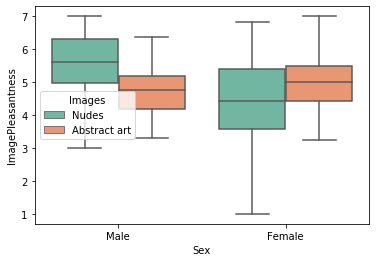

In [22]:
filepath = os.path.join('erotic_art.csv')

df = pandas.read_csv(filepath)

outcome_var = df['ImagePleasantness']
predictive_var1 =df['Sex']
predictive_var2 = df['Images']

try:
    sns.boxplot(x= predictive_var1 , y= outcome_var  , hue= predictive_var2,
    data=df,palette="Set2",fliersize=0)
except ValueError:
    print('At least one of the variables represented in x and y axis should be quantitative.')

## References <a id="ref"></a>

1- https://medium.com/@sambozek/ipython-er-jupyter-table-of-contents-69bb72cf39d3 <a id="1"></a> <br>
2- https://docs.python.org/3/library/warnings.html <a id="2"></a> <br>
3- https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/ <a id="3"></a> <br>
4- http://blog.rtwilson.com/regression-in-python-using-r-style-formula-its-easy/ <a id="4"></a> <br>
5- https://stackoverflow.com/questions/35538882/seaborn-boxplot-stripplot-duplicate-legend <a id="5"></a> <br>
6- https://seaborn.pydata.org/generated/seaborn.stripplot.html <a id="6"></a> <br>
7- https://stackoverflow.com/questions/37109021/changing-x-axis-labels-in-seaborn-boxplot <a id="7"></a> <br>
8- https://matplotlib.org/gallery/text_labels_and_annotations/multiline.html#sphx-glr-gallery-text-labels-and-annotations-multiline-py <a id="8"></a> <br>
9- https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color <a id="9"></a> <br>
10- https://stackoverflow.com/questions/44620013/title-for-matplotlib-legend <a id="10"></a> <br>
11- https://stackoverflow.com/questions/25540259/remove-or-adapt-border-of-frame-of-legend-using-matplotlib <a id="11"></a> <br>
12-https://github.com/luketudge/introduction-to-programming/blob/master/content/index.ipynb <br>
Jupyter Notebook References:  <br>
14- to format the markdown cells: https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
